# Task 3: Customer Segmentation / Clustering 

In [19]:
import pandas as pd

# Load the datasets
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [20]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF

In [21]:
# Merge customer and transaction data
customer_transactions = transactions_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionDate': 'count'
}).reset_index()
customer_transactions = customer_transactions.merge(customers_df, on='CustomerID')

# Feature engineering
features = customer_transactions[['TotalValue', 'Quantity', 'TransactionDate']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Compute similarity matrix
similarity_matrix = cosine_similarity(scaled_features)


Davies-Bouldin Index: 0.8650620583623065


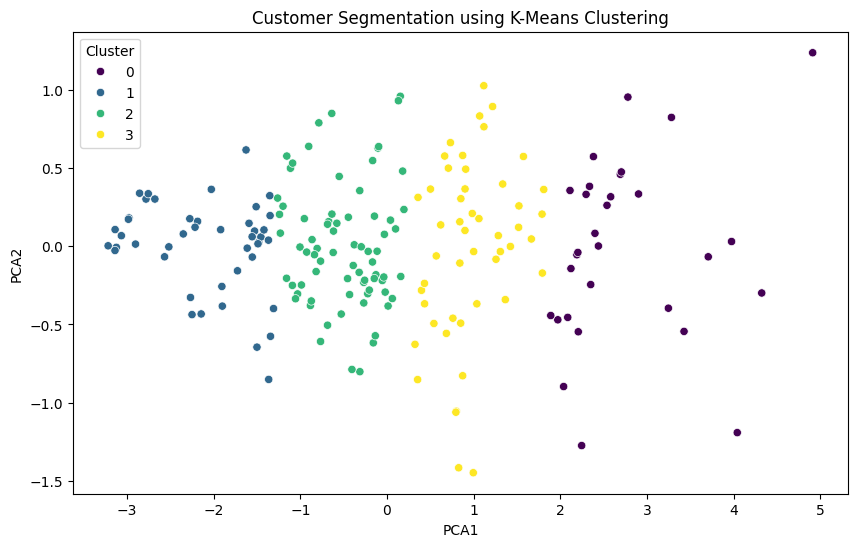

PDF report generated successfully.


In [22]:
# Use scaled features for clustering
kmeans = KMeans(n_clusters=4, random_state=42) # based on principal component analysis (PCA)
customer_transactions['Cluster'] = kmeans.fit_predict(scaled_features)

# Evaluate clustering
db_index = davies_bouldin_score(scaled_features, customer_transactions['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
customer_transactions['PCA1'] = pca_features[:, 0]
customer_transactions['PCA2'] = pca_features[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=customer_transactions, palette='viridis')
plt.title('Customer Segmentation using K-Means Clustering')
plt.savefig('clusters.png')  # Save the plot as an image
plt.show()

# Generate a PDF report
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Customer Segmentation Report', 0, 1, 'C')

    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, f'Page {self.page_no()}', 0, 0, 'C')

pdf = PDF()
pdf.add_page()
pdf.set_font('Arial', 'B', 16)
pdf.cell(0, 10, 'Clustering Results', 0, 1)
pdf.set_font('Arial', '', 12)
pdf.cell(0, 10, f'Number of clusters formed: 4', 0, 1)
pdf.cell(0, 10, f'Davies-Bouldin Index: {db_index:.2f}', 0, 1)
pdf.cell(0, 10, 'Visualization of Clusters:', 0, 1)
pdf.image('clusters.png', x=10, y=50, w=180)
pdf.output('Ayushman_Saxena_Clustering.pdf')

print("PDF report generated successfully.")